### MNIST Multi-class Model

#### Summary
In this notebook, we will leverage Keras to train a simple convolutional neural network to recognize hand-written numbers.

In [1]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPool2D
from keras.utils import np_utils
from keras.datasets import mnist

%matplotlib inline

Using TensorFlow backend.


load data sets for this problem

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train = x_train.reshape(x_train.shape[0], 1, 28, 28)
x_test = x_test.reshape(x_test.shape[0], 1, 28, 28)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [4]:
x_train.shape

(60000, 1, 28, 28)

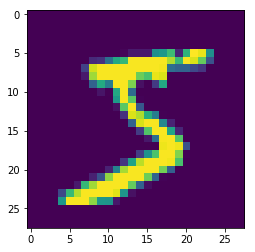

In [5]:
from matplotlib import pyplot as plt

plt.imshow(x_train[0][0])

**Figure**: Example Train Data

In [6]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

#### Define Model Architect

In [7]:
model = Sequential()

model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(1,28,28)))
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

/Users/yizhang/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(1, 28, 28...)`
  This is separate from the ipykernel package so we can avoid doing imports until


ValueError: Negative dimension size caused by subtracting 3 from 1 for 'conv2d_1/convolution' (op: 'Conv2D') with input shapes: [?,1,28,28], [3,3,28,32].

In [18]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

TypeError: Sequential model cannot be built: model is empty. Add some layers first.

In [24]:
score = model.evaluate(x_test, Y_test, verbose=0)

RuntimeError: The model needs to be compiled before being used.